In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 4.6 MB/s 


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from pulp import *
import matplotlib.pyplot as plt

In [31]:
#Read Training and Testing data
trainDF = pd.read_csv('/content/drive/MyDrive/COMP321720212022CW2A/TrainingData.txt', header=None)
y = trainDF[24].tolist()
trainDF = trainDF.drop(24, axis=1)
x = trainDF.values.tolist()
testDF = pd.read_csv('/content/drive/MyDrive/COMP321720212022CW2A/TestingData.txt', header=None)
x_classify = testDF.values.tolist()


In [33]:
#Split Full data into Test and Training for local testing using 20% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(len(x_train),len(x_test),len(y_train),len(y_test))


8000 2000 8000 2000


In [34]:
#Use the LDA model and train it with your data and perform local testing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)
print(len(y_pred))
print("Testing accuracy:",lda.score(x_test, y_test))
print("Training accuracy:",lda.score(x, y))

2000
Testing accuracy: 0.94
Training accuracy: 0.9403


In [35]:
#Classify the given Testing data and get labels
y_classify_pred = lda.predict(x_classify)
y_classify_pred = [int(i) for i in y_classify_pred]
predDF = pd.DataFrame({'Prediction': y_classify_pred})
testDF = testDF.join(predDF)
testDF.to_csv("/content/drive/MyDrive/COMP321720212022CW2A/TestingResults.txt", header=None, index=None)
predDF.to_csv("/content/drive/MyDrive/COMP321720212022CW2A/PredictionsOnly.txt", header=None, index=None)
print("Predictions Saved")
for i in range(0,100):
  print("DAY => "+str(i+1)+"\tPrediction => "+str(y_classify_pred[i]) )

Predictions Saved
DAY => 1	Prediction => 1
DAY => 2	Prediction => 0
DAY => 3	Prediction => 0
DAY => 4	Prediction => 0
DAY => 5	Prediction => 1
DAY => 6	Prediction => 1
DAY => 7	Prediction => 0
DAY => 8	Prediction => 1
DAY => 9	Prediction => 1
DAY => 10	Prediction => 0
DAY => 11	Prediction => 1
DAY => 12	Prediction => 0
DAY => 13	Prediction => 1
DAY => 14	Prediction => 0
DAY => 15	Prediction => 0
DAY => 16	Prediction => 1
DAY => 17	Prediction => 1
DAY => 18	Prediction => 1
DAY => 19	Prediction => 1
DAY => 20	Prediction => 1
DAY => 21	Prediction => 0
DAY => 22	Prediction => 1
DAY => 23	Prediction => 0
DAY => 24	Prediction => 0
DAY => 25	Prediction => 0
DAY => 26	Prediction => 1
DAY => 27	Prediction => 0
DAY => 28	Prediction => 1
DAY => 29	Prediction => 0
DAY => 30	Prediction => 1
DAY => 31	Prediction => 0
DAY => 32	Prediction => 1
DAY => 33	Prediction => 1
DAY => 34	Prediction => 0
DAY => 35	Prediction => 1
DAY => 36	Prediction => 0
DAY => 37	Prediction => 1
DAY => 38	Prediction => 1
DAY

In [16]:
#
# SVM MODEL
#
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(x_train,y_train)
# y_pred = svclassifier.predict(x_test)
# print(classification_report(y_test,y_pred))
# print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
# y_classify_pred = svclassifier.predict(x_classify)
# y_classify_pred = [int(i) for i in y_classify_pred]
# predDF = pd.DataFrame({'Prediction': y_classify_pred})
# testDF = testDF.join(predDF)
# testDF.to_csv("/content/drive/MyDrive/COMP321720212022CW2A/TestingResultsSVM.txt", header=None, index=None)
# predDF.to_csv("PredictionsOnlySVM.txt", header=None, index=None)
# print("\nPredictions in output file TestingResultsSVM.txt")


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       988
           1       0.93      0.94      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Accuracy: 0.9355

Predictions in output file TestingResultsSVM.txt


In [17]:
#
# KNN MODEL
#
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=50)
# model.fit(x_train,y_train)
# predicted= model.predict(x_test)
# print(predicted)
# print(confusion_matrix(y_test,predicted))
# print(classification_report(y_test,predicted))
# print("Accuracy:", metrics.accuracy_score(y_test,predicted))

[1 0 0 ... 1 0 1]
[[821 167]
 [ 56 956]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       988
           1       0.85      0.94      0.90      1012

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Accuracy: 0.8885


In [21]:
#Read task data from User & Task ID sheet
input = pd.read_excel ('/content/drive/MyDrive/COMP321720212022CW2A/COMP3217CW2Input.xlsx', sheet_name = 'User & Task ID')
taskName = input['User & Task ID'].tolist()
readyTime = input['Ready Time'].tolist()
deadline = input['Deadline'].tolist()
maxEnergyPerHour = input['Maximum scheduled energy per hour'].tolist()
energyDemand = input['Energy Demand'].tolist()
tasks = []
taskNames = []

#Store Tasks in a list of lists
for i in range (len(readyTime)):
    task = []
    task.append(readyTime[i])
    task.append(deadline[i])
    task.append(maxEnergyPerHour[i])
    task.append(energyDemand[i])
    taskNames.append(taskName[i])
    tasks.append(task)
          
#Reading Testing Data Output
testDF = pd.read_csv('/content/drive/MyDrive/COMP321720212022CW2A/TestingResults.txt', header=None)
y_results = testDF[24].tolist()
testDF = testDF.drop(24, axis=1)
x_data = testDF.values.tolist()

#Read the abnormal pricing guide for scheduling prices
abnormal_price_list = pd.read_excel ('/content/drive/MyDrive/COMP321720212022CW2A/COMP3217CW2Input.xlsx', sheet_name = 'AbnormalGuidelinePricing')
abnormal_price_list = abnormal_price_list['Unit Cost'].tolist()
print(abnormal_price_list)




[4.2465223767728215, 3.6400277961434484, 3.4805026391870144, 3.245460994702561, 3.162915991869035, 3.5976674954444445, 3.9053559544181216, 4.078340246287899, 5.3747974263961735, 4.94469912358377, 5.438100082715939, 3.909231366353989, 6.200666726194097, 4.482141894148048, 5.41080155790966, 6.1491709685010445, 5.883768700097348, 6.329263207607548, 3.40001, 5.5834976200853035, 5.558922378575759, 5.255354797477159, 5.5684806127528805, 5.441475566897596]


In [2]:
#Plot bar charts to display scheduled pricing curves 
def plot(model, count, cost):
    hours = [str(x) for x in range(0, 24)]
    pos = np.arange(len(hours))
    users = ['user1', 'user2', 'user3', 'user4', 'user5']
    colors = ['red','green','blue','orange','yellow']
    plot_list = []
    
    #Store usage for each hour in a list
    for user in users:
        temp_list = []
        for hour in hours:
            hour_list_temp = []
            task_count = 0
            for var in model.variables():
                if user == var.name.split('_')[0] and str(hour) == var.name.split('_')[2]:
                    task_count += 1
                    hour_list_temp.append(var.value())
            temp_list.append(sum(hour_list_temp))
        plot_list.append(temp_list)

    #Stack users as bars
    plt.bar(pos,plot_list[0],color=colors[0],edgecolor='black',bottom=0)
    plt.bar(pos,plot_list[1],color=colors[1],edgecolor='black',bottom=np.array(plot_list[0]))
    plt.bar(pos,plot_list[2],color=colors[2],edgecolor='black',bottom=np.array(plot_list[0])+np.array(plot_list[1]))
    plt.bar(pos,plot_list[3],color=colors[3],edgecolor='black',bottom=np.array(plot_list[0])+np.array(plot_list[1])+np.array(plot_list[2]))
    plt.bar(pos,plot_list[4],color=colors[4],edgecolor='black',bottom=np.array(plot_list[0])+np.array(plot_list[1])+np.array(plot_list[2])+np.array(plot_list[3]))
    plt.xticks(pos, hours)
    plt.xlabel('Hour')
    plt.ylabel('Energy Usage (kW)')
    plt.title('Energy Usage Per Hour For All Users\nDay %i\nMinimized Cost = %.15f'%(count ,cost))
    plt.legend(users,loc=0)
    plt.show()
    fig = plt.gcf()
    fig.savefig('/content/drive/MyDrive/COMP321720212022CW2A/plots/'+str(count)+'.png')
    plt.clf()

    return plot_list

In [36]:
print(LpStatus[answer], value(model.objective))

Optimal 420.5168299497699


Optimal 420.5168299497699


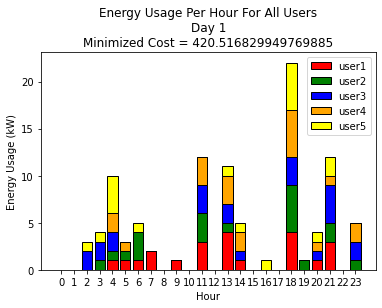

Optimal 420.5168299497699


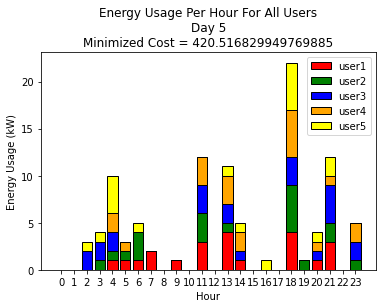

Optimal 420.5168299497699


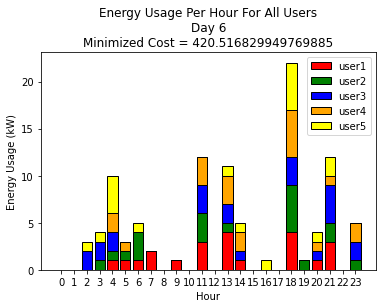

Optimal 420.5168299497699


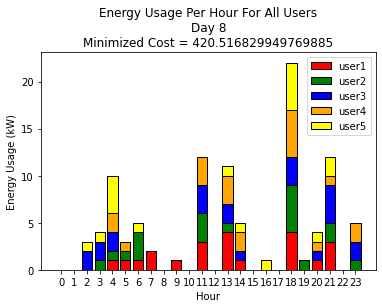

Optimal 420.5168299497699


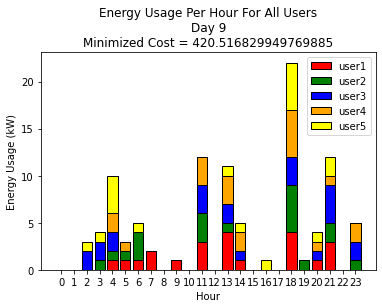

Optimal 420.5168299497699


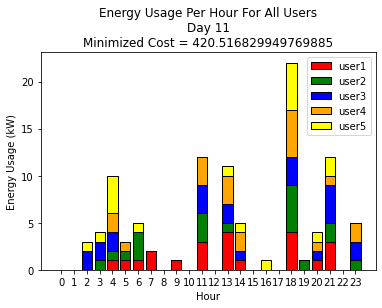

Optimal 420.5168299497699


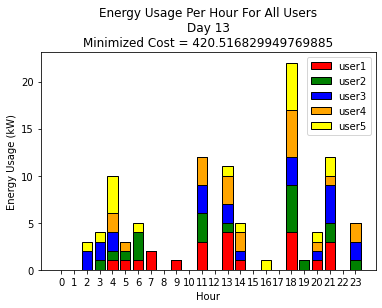

Optimal 420.5168299497699


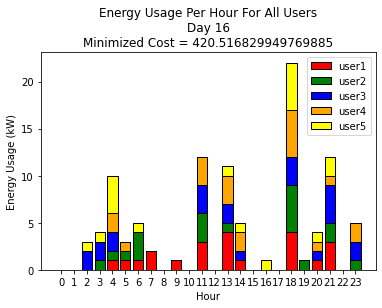

Optimal 420.5168299497699


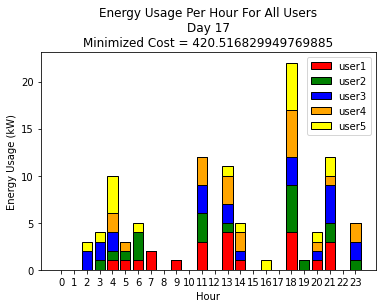

Optimal 420.5168299497699


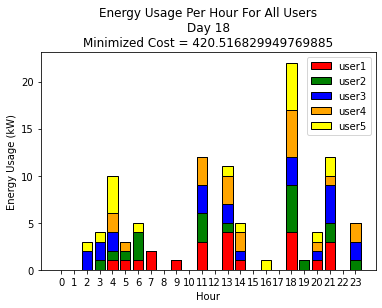

Optimal 420.5168299497699


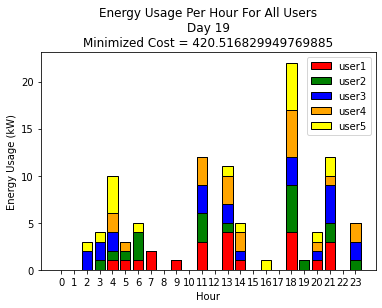

Optimal 420.5168299497699


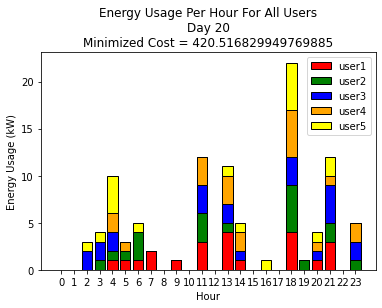

Optimal 420.5168299497699


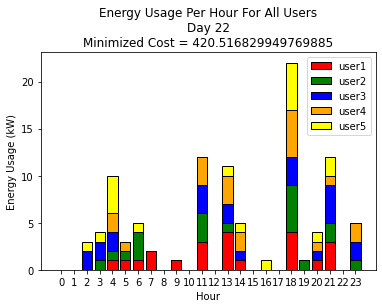

Optimal 420.5168299497699


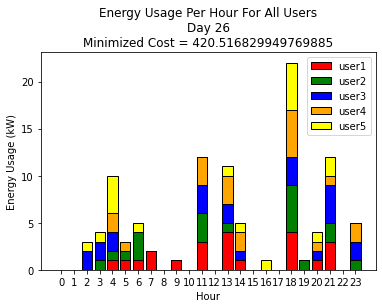

Optimal 420.5168299497699


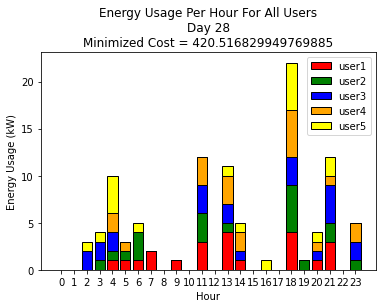

Optimal 420.5168299497699


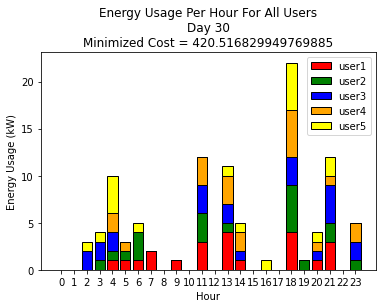

Optimal 420.5168299497699


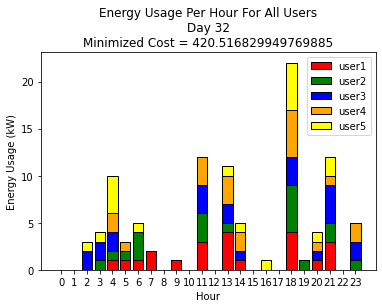

Optimal 420.5168299497699


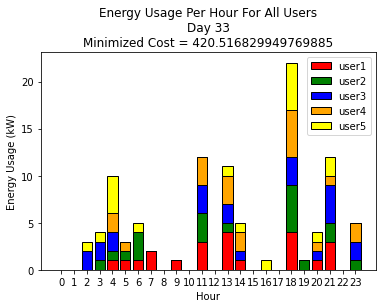

Optimal 420.5168299497699


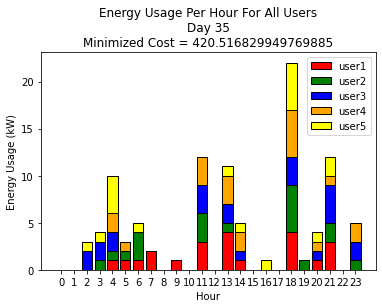

Optimal 420.5168299497699


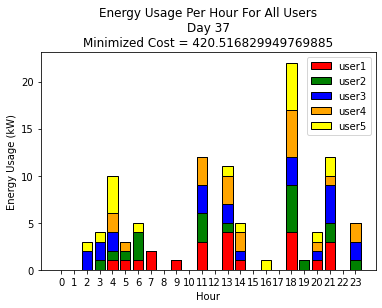

Optimal 420.5168299497699


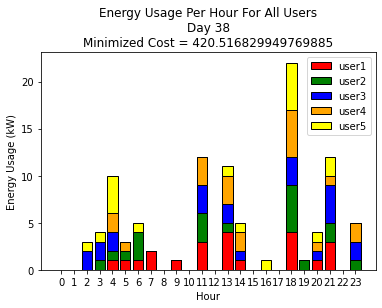

Optimal 420.5168299497699


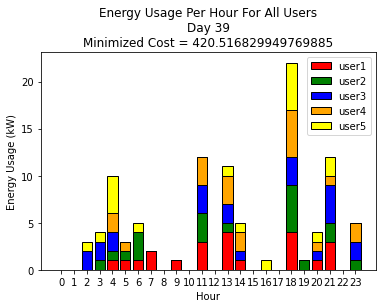

Optimal 420.5168299497699


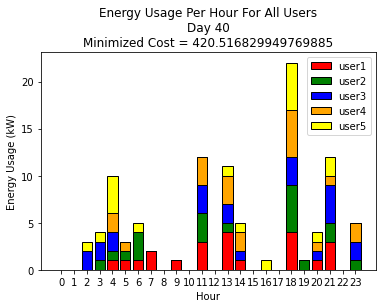

Optimal 420.5168299497699


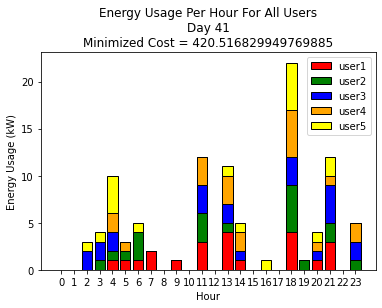

Optimal 420.5168299497699


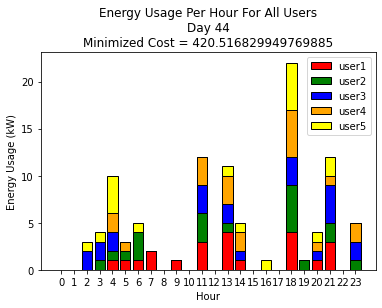

Optimal 420.5168299497699


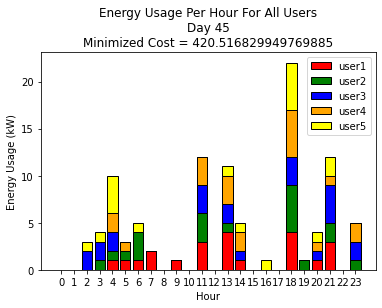

Optimal 420.5168299497699


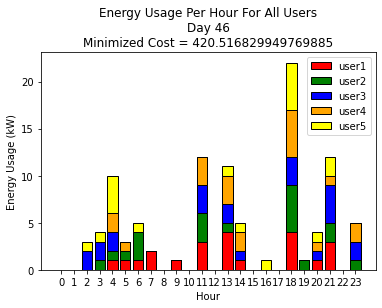

Optimal 420.5168299497699


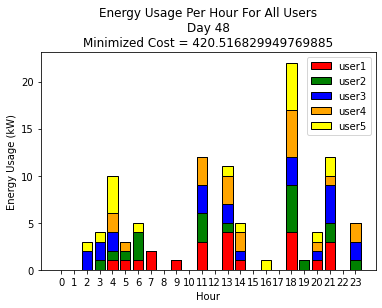

Optimal 420.5168299497699


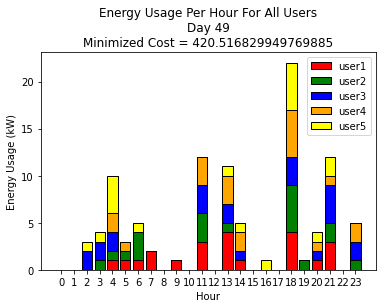

Optimal 420.5168299497699


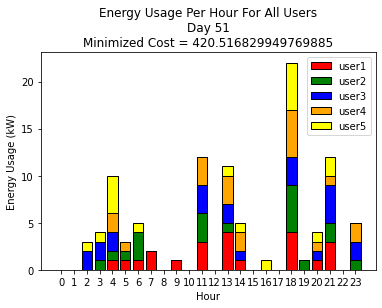

Optimal 420.5168299497699


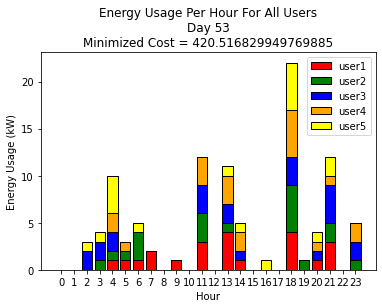

Optimal 420.5168299497699


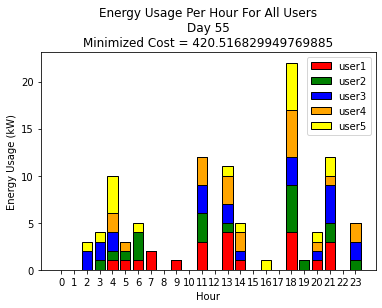

Optimal 420.5168299497699


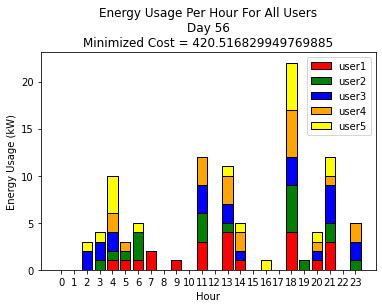

Optimal 420.5168299497699


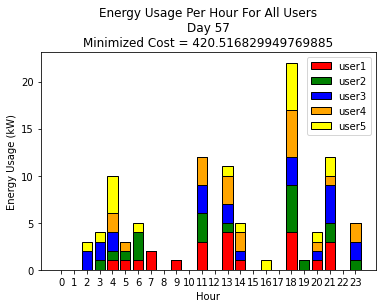

Optimal 420.5168299497699


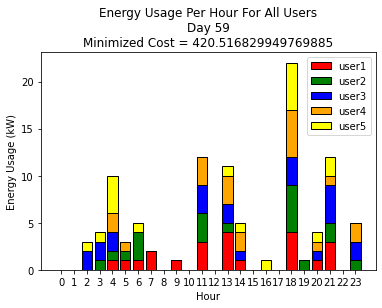

Optimal 420.5168299497699


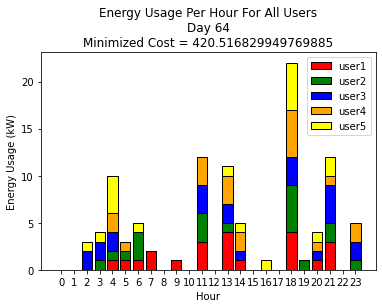

Optimal 420.5168299497699


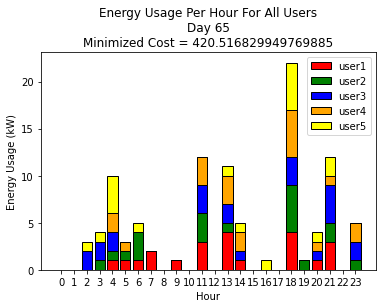

Optimal 420.5168299497699


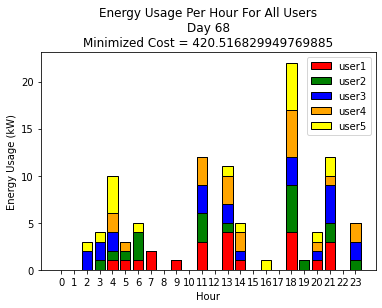

Optimal 420.5168299497699


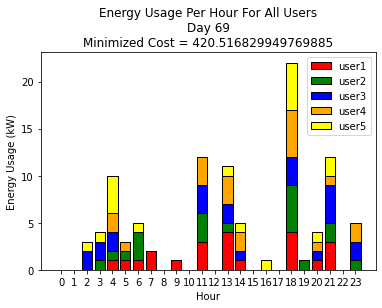

Optimal 420.5168299497699


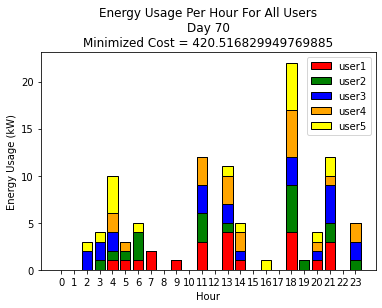

Optimal 420.5168299497699


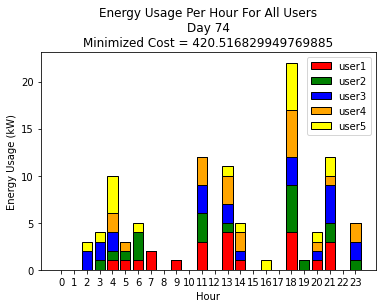

Optimal 420.5168299497699


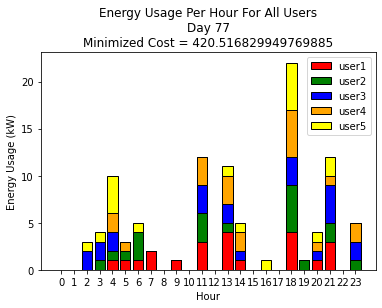

Optimal 420.5168299497699


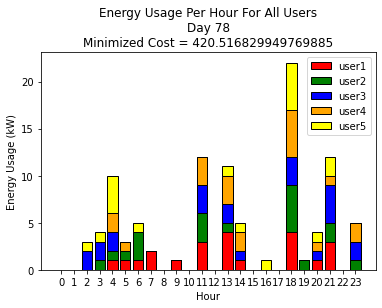

Optimal 420.5168299497699


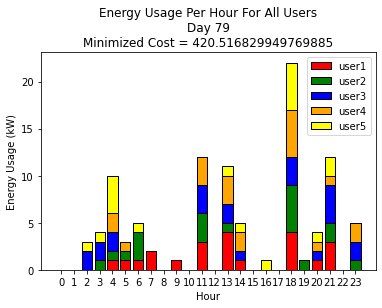

Optimal 420.5168299497699


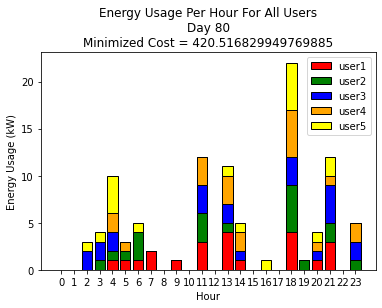

Optimal 420.5168299497699


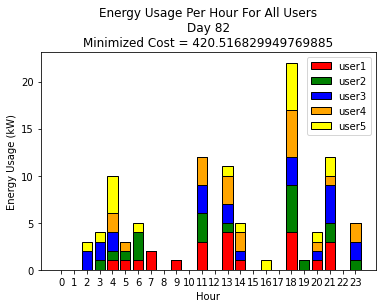

Optimal 420.5168299497699


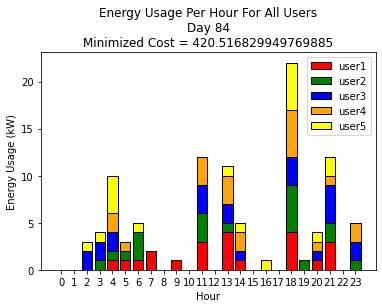

Optimal 420.5168299497699


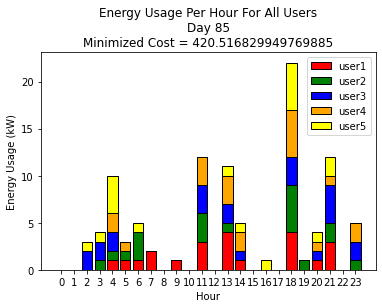

Optimal 420.5168299497699


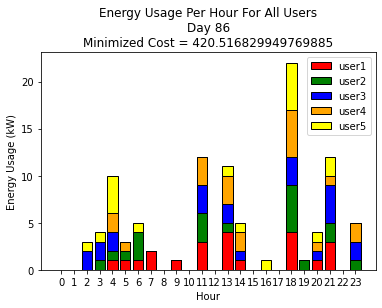

Optimal 420.5168299497699


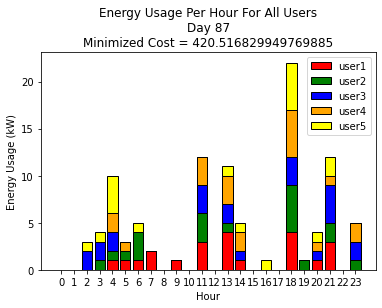

Optimal 420.5168299497699


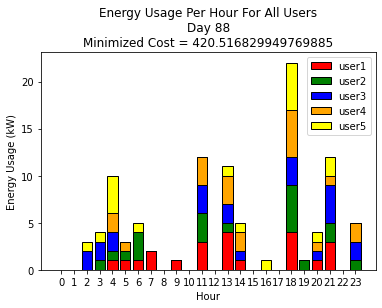

Optimal 420.5168299497699


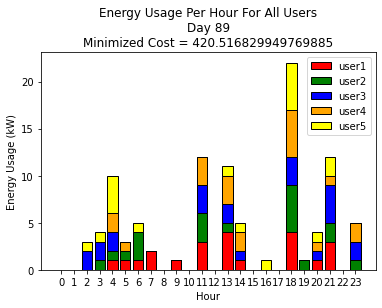

Optimal 420.5168299497699


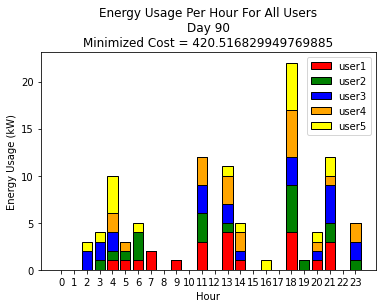

Optimal 420.5168299497699


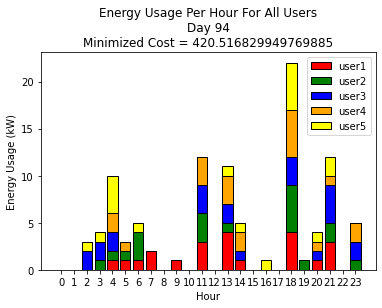

Optimal 420.5168299497699


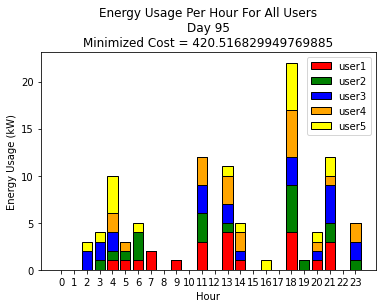

Optimal 420.5168299497699


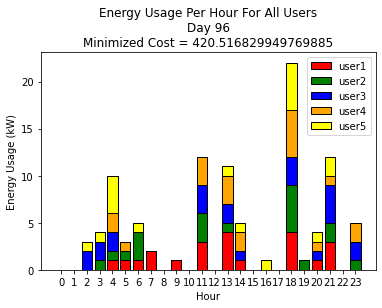

Optimal 420.5168299497699


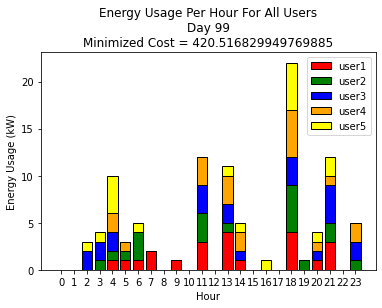

57


<Figure size 432x288 with 0 Axes>

In [23]:
answerlist=[]
for index, price_list in enumerate(x_data):
  if y_results[index] == 1:
    vars = []
    c = []
    eq = []
    
    #Generate min LpProblem   
    model = LpProblem(name="scheduling-problem", sense=LpMinimize)
    
    #Loop through tasks to create the LpProblem
    for ind, task in enumerate(tasks):
        n = task[1] - task[0] + 1
        temp = []
        for i in range(task[0], task[1] + 1):
            x = LpVariable(name=taskNames[ind]+'_'+str(i), lowBound=0, upBound=task[2])
            temp.append(x)
        vars.append(temp)
        for var in vars[ind]:
            price = abnormal_price_list[int(var.name.split('_')[2])]
            c.append(price * var)
    model += lpSum(c)
                
    #Add constraints on which minimization should happen    
    for i, task in enumerate(tasks):
        temp = []
        for var in vars[i]:
            temp.append(var)
        eq.append(temp)
        model += lpSum(temp) == task[3]
      
    #Solve the LpProblem
    answer = model.solve()
    answerlist.append(answer)
    print(LpStatus[answer], value(model.objective))
    
    #Plot bar charts
    plot(model,index+1,value(model.objective))
      
print(len(answerlist))  